In [1]:
!git clone -b Sebastian-Gutierrez https://github.com/MiguelGonzalez197/Proyectos-Deep-Learning


Cloning into 'Proyectos-Deep-Learning'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 20 (delta 8), reused 3 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (20/20), 34.89 KiB | 1.84 MiB/s, done.
Resolving deltas: 100% (8/8), done.


In [ ]:
import tensorflow as tf
from google.colab import files
import pandas as pd

In [ ]:
#Carga de dataset .xslx

uploaded=files.upload()
nombre_archivo=list(uploaded.keys())[0]
df=pd.read_csv(nombre_archivo,sep=";",encoding="latin1")

Saving Dataset_ExamenesLaboratorio_ConsultaExterna_PatologíasRelacionadas_Obesidad_202405_202411.csv to Dataset_ExamenesLaboratorio_ConsultaExterna_PatologíasRelacionadas_Obesidad_202405_202411.csv


In [ ]:
#PreProcesamiento del dataset
f=df.fillna(0)

cod_dep,map_Dep=pd.factorize(df["DEPARTAMENTO"])
df["DEPARTAMENTO"]=cod_dep +1

cod_Prov,map_Prov=pd.factorize(df["PROVINCIA"])
df["PROVINCIA"]=cod_Prov+1

cod_Dist,map_Dist=pd.factorize(df["DISTRITO"])
df["DISTRITO"]=cod_Dist+1

df['EDAD_PACIENTE'] = pd.cut(
    df['EDAD_PACIENTE'],
    bins=[0, 10, 20, 30,40,50,60,70,80,90,100,110],
    labels=[1, 2, 3,4,5,6,7,8,9,10,11],
    right=False
)

cod_sex,map_Sex=pd.factorize(df["SEXO_PACIENTE"])
df["SEXO_PACIENTE"]=cod_sex+1

cod_Diag,map_Diag=pd.factorize(df["DIAGNOSTICO"])
df["DIAGNOSTICO"]=cod_Diag+1

cod_Serv,map_Serv=pd.factorize(df["SERVICIO_HOSPITALARIO"])
df["SERVICIO_HOSPITALARIO"]=cod_Serv+1

cod_Pro1,map_Pro1=pd.factorize(df["PROCEDIMIENTO_1"])
df["PROCEDIMIENTO_1"]=cod_Pro1+1

df.loc[
    (df["UNIDADES_1"] == "mmol/lt") & (df["PROCEDIMIENTO_1"] == 1),
    "RESULTADO_1"
] *= 18

df.loc[
    (df["UNIDADES_1"] == "mmol/lt") & (df["PROCEDIMIENTO_1"] == 2),
    "RESULTADO_1"
] *= 88.57

cod_Pro1,map_Pro1=pd.factorize(df["PROCEDIMIENTO_2"])
df["PROCEDIMIENTO_2"]=cod_Pro1+1

df.loc[
    (df["UNIDADES_2"] == "mmol/lt") & (df["PROCEDIMIENTO_2"] == 1),
    "RESULTADO_2"
] *= 18

df.loc[
    (df["UNIDADES_2"] == "mmol/lt") & (df["PROCEDIMIENTO_2"] == 2),
    "RESULTADO_2"
] *= 88.57


df = df.drop(df.columns[[0, 4, 5,6,7,10,11,12,14,16,17,18,19,22,23,26,27]], axis=1)


df.to_excel("resultado.xlsx",index=False)#Exportacion de dataset preprocesado en .xlsx


In [ ]:
#Mapas de categorizacion numerica a cada columna de informacion
mapeo = {valor: i + 1 for i, valor in enumerate(map_Dep)}
print(mapeo)

mapeo = {valor: i + 1 for i, valor in enumerate(map_Prov)}
print(mapeo)

mapeo = {valor: i + 1 for i, valor in enumerate(map_Dist)}
print(mapeo)

mapeo = {valor: i + 1 for i, valor in enumerate(map_Sex)}
print(mapeo)

mapeo = {valor: i + 1 for i, valor in enumerate(map_Diag)}
print(mapeo)

mapeo = {valor: i + 1 for i, valor in enumerate(map_Serv)}
print(mapeo)

mapeo = {valor: i + 1 for i, valor in enumerate(map_Pro1)}
print(mapeo)

{'LIMA': 1, 'LA LIBERTAD': 2, 'CAJAMARCA': 3, 'CALLAO': 4, 'AREQUIPA': 5, 'ANCASH': 6, 'HUANUCO': 7, 'SAN MARTIN': 8, 'TUMBES': 9, 'JUNIN': 10, 'LORETO': 11, 'AMAZONAS': 12, 'PIURA': 13, 'ICA': 14, 'TACNA': 15, 'AYACUCHO': 16, 'APURIMAC': 17, 'LAMBAYEQUE': 18, 'MOQUEGUA': 19, 'PUNO': 20, 'CUSCO': 21, 'PASCO': 22, 'MADRE DE DIOS': 23, 'HUANCAVELICA': 24}
{'LIMA': 1, 'TRUJILLO': 2, 'JAEN': 3, 'CALLAO': 4, 'AREQUIPA': 5, 'SANTA': 6, 'HUANUCO': 7, 'SAN MARTIN': 8, 'TUMBES': 9, 'HUANCAYO': 10, 'MAYNAS': 11, 'CHACHAPOYAS': 12, 'HUAURA': 13, 'PIURA': 14, 'CAJAMARCA': 15, 'ICA': 16, 'TACNA': 17, 'HUARAL': 18, 'HUAMANGA': 19, 'ABANCAY': 20, 'CHICLAYO': 21, 'LAMBAYEQUE': 22, 'MOYOBAMBA': 23, 'HUARAZ': 24, 'ANDAHUAYLAS': 25, 'MARISCAL NIETO': 26, 'SAN ROMAN': 27, 'CUSCO': 28, 'CHANCHAMAYO': 29, 'CASMA': 30, 'CANETE': 31, 'MARISCAL CACERES': 32, 'FERRENAFE': 33, 'ILO': 34, 'PUNO': 35, 'LORETO': 36, 'PASCO': 37, 'OXAPAMPA': 38, 'TALARA': 39, 'ISLAY': 40, 'CHEPEN': 41, 'CONCEPCION': 42, 'CHINCHA': 4

In [ ]:
#Exportacion de archivo .xlsx a un arreglo numpy
df = pd.read_excel("resultado.xlsx")

y = df["DIAGNOSTICO"]
X = df.drop(columns=["DIAGNOSTICO"])

X = X.values
y = y.values

#Cambio Oscar
y = y.astype('int32') - 1

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
#Aleatorizacion y distribucion del data set

#Pesos para dataset train/val/test
train_peso = 0.65
val_peso   = 0.20
test_peso  = 0.15

total_size = len(X)
train_size = int(train_peso * total_size)
val_size   = int(val_peso * total_size)
test_size  = total_size - train_size - val_size

dataset = tf.data.Dataset.from_tensor_slices((X, y))
dataset = dataset.shuffle(len(X), seed=42)

train_dataset = dataset.take(train_size)
rest_dataset  = dataset.skip(train_size)

val_dataset   = rest_dataset.take(val_size)
test_dataset  = rest_dataset.skip(val_size)

#Division de dataset por lotes

train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE) #Lotes del dataset para train
val_dataset   = val_dataset.batch(32).prefetch(tf.data.AUTOTUNE) #Lotes del dataset para val
test_dataset  = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE) #Lotes del dataset para test




In [ ]:
import numpy as np

input_dim = X.shape[1]
num_classes = len(np.unique(y))

print("Número de características:", input_dim)
print("Número de clases:", num_classes)

Número de características: 10
Número de clases: 9


In [ ]:
print("Diagnósticos originales:")
for i, diag in enumerate(map_Diag):
    print(f"{i} → {diag}")

Diagnósticos originales:
0 → HIPOTIROIDISMO, NO ESPECIFICADO
1 → SOBREPESO
2 → OBESIDAD, NO ESPECIFICADA
3 → OBESIDAD DEBIDA A EXCESO DE CALORIAS
4 → CONSULTA PARA INSTRUCCION Y VIGILANCIA DE LA DIETA
5 → OTROS TIPOS DE OBESIDAD
6 → OBESIDAD EXTREMA CON HIPOVENTILACION ALVEOLAR
7 → OTROS TRASTORNOS DE LA GLANDULA HIPOFISIS
8 → OBESIDAD INDUCIDA POR DROGAS


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import HeNormal

input_dim = 10
num_classes = 9

model = Sequential([
    Dense(128, activation='relu', kernel_initializer=HeNormal(), input_shape=(input_dim,)),
    Dense(64, activation='relu', kernel_initializer=HeNormal()),
    Dense(32, activation='relu', kernel_initializer=HeNormal()),
    Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 9)              │           297 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,041 (47.04 KB)

 Trainable params: 12,041 (47.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=60
)

Epoch 1/60
1296/1296 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5048 - loss: 1.2692 - val_accuracy: 0.5458 - val_loss: 1.0995
Epoch 2/60
1296/1296 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5416 - loss: 1.1141 - val_accuracy: 0.5461 - val_loss: 1.0996
Epoch 3/60
1296/1296 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5492 - loss: 1.1000 - val_accuracy: 0.5543 - val_loss: 1.0892
Epoch 4/60
1296/1296 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5587 - loss: 1.0828 - val_accuracy: 0.5640 - val_loss: 1.0732
Epoch 5/60
1296/1296 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5635 - loss: 1.0753 - val_accuracy: 0.5601 - val_loss: 1.0753
Epoch 6/60
1296/1296 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5673 - loss: 1.0611 - val_accuracy: 0.5772 - val_loss: 1.0449
Epoch 7/60
1296/1296 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5693 - loss: 1.0576 - val_accuracy: 0.5690 - val_loss: 1.0568
Epoch 8/60
1296/1296 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5700 - loss: 1.0609 - 

In [ ]:
# 4) Bésqueda de hiperparametros
def crear_modelo(units1, units2, units3=None, lr=0.001):
    model = tf.keras.Sequential()

    model.add(tf.keras.layers.Dense(units1, activation='relu',
                                    kernel_initializer=HeNormal(),
                                    input_shape=(input_dim,)))

    model.add(tf.keras.layers.Dense(units2, activation='relu',
                                    kernel_initializer=HeNormal()))

    if units3:
        model.add(tf.keras.layers.Dense(units3, activation='relu',
                                        kernel_initializer=HeNormal()))

    model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [ ]:
print("===== MODELO A =====")
model_A = crear_modelo(64, 32, lr=0.001)
history_A = model_A.fit(train_dataset, validation_data=val_dataset, epochs=60)

print("\n===== MODELO B =====")
model_B = crear_modelo(128, 64, 32, lr=0.001)
history_B = model_B.fit(train_dataset, validation_data=val_dataset, epochs=60)

print("\n===== MODELO C =====")
model_C = crear_modelo(256, 128, 64, lr=0.0005)
history_C = model_C.fit(train_dataset, validation_data=val_dataset, epochs=60)

# Cambio de batch size
train_dataset_64 = train_dataset.unbatch().batch(64).prefetch(tf.data.AUTOTUNE)
val_dataset_64 = val_dataset.unbatch().batch(64).prefetch(tf.data.AUTOTUNE)

print("\n===== MODELO D =====")
model_D = crear_modelo(256, 128, 64, lr=0.0005)
history_D = model_D.fit(train_dataset_64,
                        validation_data=val_dataset_64,
                        epochs=80)

===== MODELO A =====
Epoch 1/60
1296/1296 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4862 - loss: 1.3056 - val_accuracy: 0.5353 - val_loss: 1.1275
Epoch 2/60
1296/1296 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5453 - loss: 1.1177 - val_accuracy: 0.5529 - val_loss: 1.1092
Epoch 3/60
1296/1296 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5494 - loss: 1.1078 - val_accuracy: 0.5492 - val_loss: 1.1058
Epoch 4/60
1296/1296 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5480 - loss: 1.0974 - val_accuracy: 0.5548 - val_loss: 1.0913
Epoch 5/60
1296/1296 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5540 - loss: 1.0958 - val_accuracy: 0.5636 - val_loss: 1.0816
Epoch 6/60
1296/1296 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5598 - loss: 1.0865 - val_accuracy: 0.5564 - val_loss: 1.0825
Epoch 7/60
1296/1296 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5644 - loss: 1.0725 - val_accuracy: 0.5700 - val_loss: 1.0546
Epoch 8/60
1296/1296 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:160: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


648/648 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4955 - loss: 1.3187 - val_accuracy: 0.5533 - val_loss: 1.1083
Epoch 2/80
648/648 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5495 - loss: 1.1069 - val_accuracy: 0.5507 - val_loss: 1.0946
Epoch 3/80
648/648 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5561 - loss: 1.0980 - val_accuracy: 0.5562 - val_loss: 1.0903
Epoch 4/80
648/648 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5581 - loss: 1.0869 - val_accuracy: 0.5626 - val_loss: 1.0674
Epoch 5/80
648/648 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5626 - loss: 1.0795 - val_accuracy: 0.5657 - val_loss: 1.0643
Epoch 6/80
648/648 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5676 - loss: 1.0608 - val_accuracy: 0.5661 - val_loss: 1.0571
Epoch 7/80
648/648 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5678 - loss: 1.0614 - val_accuracy: 0.5826 - val_loss: 1.0370
Epoch 8/80
648/648 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5743 - loss: 1.0533 - val_accuracy: 0.5754 - val_

In [ ]:
#MODELO ELEGIDO

# Cambio de batch size
train_dataset_64 = train_dataset.unbatch().batch(64).prefetch(tf.data.AUTOTUNE)
val_dataset_64 = val_dataset.unbatch().batch(64).prefetch(tf.data.AUTOTUNE)

print("\n===== MODELO D =====")
model_D = crear_modelo(256, 128, 64, lr=0.0005)
history_D = model_D.fit(train_dataset_64,
                        validation_data=val_dataset_64,
                        epochs=80)




===== MODELO D =====
Epoch 1/80
    648/Unknown 4s 3ms/step - accuracy: 0.4998 - loss: 1.2560

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:160: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


648/648 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4998 - loss: 1.2558 - val_accuracy: 0.5370 - val_loss: 1.1271
Epoch 2/80
648/648 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5474 - loss: 1.1040 - val_accuracy: 0.5601 - val_loss: 1.0840
Epoch 3/80
648/648 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5549 - loss: 1.0905 - val_accuracy: 0.5643 - val_loss: 1.0793
Epoch 4/80
648/648 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5593 - loss: 1.0910 - val_accuracy: 0.5588 - val_loss: 1.0748
Epoch 5/80
648/648 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5685 - loss: 1.0645 - val_accuracy: 0.5584 - val_loss: 1.0681
Epoch 6/80
648/648 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5710 - loss: 1.0641 - val_accuracy: 0.5717 - val_loss: 1.0592
Epoch 7/80
648/648 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5726 - loss: 1.0582 - val_accuracy: 0.5727 - val_loss: 1.0560
Epoch 8/80
648/648 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5779 - loss: 1.0525 - val_accuracy: 0.5790 - val_

In [ ]:
print("Mejor val_accuracy Modelo D:", max(history_D.history['val_accuracy']))

Mejor val_accuracy Modelo D: 0.638294517993927


In [ ]:
# Evaluar el modelo D
test_loss, test_acc = model_D.evaluate(test_dataset)

print("===== RESULTADOS EN TEST =====")
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6327 - loss: 0.9033
===== RESULTADOS EN TEST =====
Test Loss: 0.8969751596450806
Test Accuracy: 0.631177544593811


In [ ]:
# Predicciones
import numpy as np

y_pred_prob = model_D.predict(test_dataset)

# Si es multiclase
y_pred = np.argmax(y_pred_prob, axis=1)

y_true = np.concatenate([y for x, y in test_dataset], axis=0)

if len(y_true.shape) > 1:
    y_true = np.argmax(y_true, axis=1)

300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


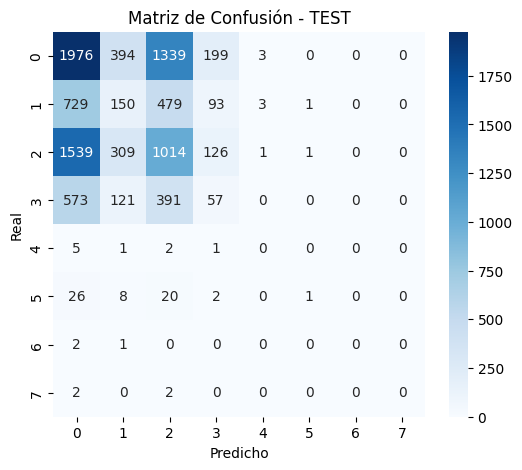

              precision    recall  f1-score   support

           0       0.41      0.51      0.45      3911
           1       0.15      0.10      0.12      1455
           2       0.31      0.34      0.33      2990
           3       0.12      0.05      0.07      1142
           4       0.00      0.00      0.00         9
           5       0.33      0.02      0.03        57
           6       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         4

    accuracy                           0.33      9571
   macro avg       0.17      0.13      0.13      9571
weighted avg       0.30      0.33      0.31      9571



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Matriz de confusion
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - TEST")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()

print(classification_report(y_true, y_pred))

In [ ]:
print("Mejor val_accuracy Modelo A:", max(history_A.history['val_accuracy']))
print("Mejor val_accuracy Modelo B:", max(history_B.history['val_accuracy']))
print("Mejor val_accuracy Modelo C:", max(history_C.history['val_accuracy']))
print("Mejor val_accuracy Modelo D:", max(history_D.history['val_accuracy']))

Mejor val_accuracy Modelo A: 0.6021631956100464
Mejor val_accuracy Modelo B: 0.6194843053817749
Mejor val_accuracy Modelo C: 0.6339054703712463
Mejor val_accuracy Modelo D: 0.6393133997917175
